# CNNs for CIFAR-10 Classification - Model 2

In [1]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, Dropout

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the datasets
data_train = np.load(r"cifar_10_train_data.npz")
data_val = np.load(r"cifar_10_validation_data.npz")
data_test = np.load(r"cifar_10_test_data.npz")

In [3]:
# Extracting the arrays from the imported data
images_train = data_train['inputs']
labels_train = data_train['targets']

images_val = data_val['inputs']
labels_val = data_val['targets']

images_test = data_test['inputs']
labels_test = data_test['targets']

In [4]:
# Scaling the pixel values of all images
images_train = images_train/255.0
images_val = images_val/255.0
images_test = images_test/255.0

In [5]:
# Flipping the images right to left
images_train_flipped = np.flip(images_train, axis=2)
images_val_flipped = np.flip(images_val, axis=2)
images_test_flipped = np.flip(images_test, axis=2)

# Combining the flipped dataset with the original one to obtain the new dataset
images_train = np.concatenate( (images_train, images_train_flipped) )
labels_train = np.concatenate( (labels_train, labels_train) )

images_val = np.concatenate( (images_val, images_val_flipped) )
labels_val = np.concatenate( (labels_val, labels_val) )

images_test = np.concatenate( (images_test, images_test_flipped) )
labels_test = np.concatenate( (labels_test, labels_test) )

In [6]:
output_size = 10

base_model = load_model(r"saved_models\Model 1")
base_model.trainable = False


x = base_model.get_layer('flatten').output
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.5, name='dropout1')(x)

predictions = Dense(output_size, name='predictions')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary(line_length = 100)


Model: "model"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
block1_conv1_input (InputLayer)              [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
block1_conv1 (Conv2D)                        (None, 32, 32, 64)                      1792           
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)                   (None, 16, 16, 64)                      0              
____________________________________________________________________________________________________
block2_conv1 (Conv2D)                        (None, 16, 16, 128)                     73856          
____________________________________________________________________________

In [7]:
# Defining constants
EPOCHS = 15
BATCH_SIZE = 64

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  mode = 'auto',
                                                  min_delta = 0,
                                                  patience = 1,
                                                  verbose = 0,
                                                  restore_best_weights = True,
                                                 )

# Training the model
history = model.fit(images_train,
                    labels_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks = [early_stopping],
                    validation_data = (images_val,labels_val),
                    verbose = 1)

Epoch 1/15
1407/1407 [==============================] - 243s 171ms/step - loss: 0.5385 - accuracy: 0.8117 - val_loss: 0.5756 - val_accuracy: 0.8073
Epoch 2/15
1407/1407 [==============================] - 243s 172ms/step - loss: 0.3934 - accuracy: 0.8594 - val_loss: 0.5739 - val_accuracy: 0.8162
Epoch 3/15
1407/1407 [==============================] - 243s 173ms/step - loss: 0.3269 - accuracy: 0.8842 - val_loss: 0.5813 - val_accuracy: 0.8252
Epoch 4/15
1407/1407 [==============================] - 242s 172ms/step - loss: 0.2745 - accuracy: 0.9018 - val_loss: 0.6102 - val_accuracy: 0.8209


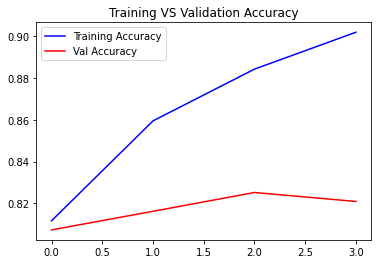

In [8]:
# We can use our variable history

accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'blue', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Val Accuracy')
plt.title('Training VS Validation Accuracy')
plt.legend()
plt.show()

In [9]:
model.evaluate(images_test, labels_test)

625/625 [==============================] - 46s 74ms/step - loss: 0.6337 - accuracy: 0.8008


[0.6337419748306274, 0.8008000254631042]

In [10]:
model.save(r"saved_models\Model 2")

INFO:tensorflow:Assets written to: saved_models\Model 2\assets
